In [33]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import os, re, sys
from sklearn.model_selection import train_test_split
import skimage.io

In [3]:
# test if GPUs are available
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# set project root, maybe you need to firstly 
# add shortcut of CS 766 Project to drive.
project_root = './drive/MyDrive/CS 766 Project/Project Coding and Data Files'

In [130]:
# class to initialize CNNs
class OriginCNN(object):
  """docstring for OriginCNN"""
  def __init__(self):
    # self.optimizer = 'sgd'
    self.optimizer = tf.keras.optimizers.SGD(lr=0.05, decay=1e-6, momentum=0.9, nesterov=True)
    self.loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    # will add more properties


  def build(self):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), strides=(3,3), activation='relu', input_shape=(1000, 1000, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(32, (3, 3), strides=(3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(32, (3, 3), strides=(3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation='sigmoid'))
    model.add(layers.Dense(5))

    model.summary()
    model.compile(optimizer=self.optimizer,
                loss=self.loss,
                metrics=['accuracy'])
    self.model = model


  def train(self, train_images, train_labels, validate_images, validate_labels, epochs):
    self.history = self.model.fit(train_images, train_labels, epochs=epochs, 
        validation_data=(validate_images, validate_labels))


  def evaluate(self, test_images, test_labels):
    plt.plot(self.history.history['accuracy'], label='accuracy')
    plt.plot(self.history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')

    test_loss, test_acc = self.model.evaluate(test_images, test_labels, verbose=2)

    print(test_acc)

  def save_model(self, filepath):
    self.model.save(filepath)

  def load_model(self, filepath):
    self.model = tf.keras.models.load_model(filepath)

In [45]:
class DR_resized(object):
  """docstring for DR_resized"""
  def __init__(self):
    # load images
    all_images = np.load(os.path.join(project_root, "Processed_Data_Batches", "Processed_Xtrain_Batch0.npy"))
    # add a dimension for channels
    all_images = np.expand_dims(all_images, axis=-1)

    # load labels
    all_labels = np.load(os.path.join(project_root, "Data Batches", "Ytrain_Batch0.npy"), allow_pickle=True)
    all_labels = np.array([item[1] for item in all_labels])
    all_labels = np.expand_dims(all_labels, axis=-1)
    
    self.train_images, self.validate_images, self.train_labels, self.validate_labels \
    = train_test_split(all_images, all_labels, test_size=0.2, random_state=9876)


In [136]:
myModel = OriginCNN()

In [46]:
myData = DR_resized()

In [137]:
myModel.build()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 333, 333, 32)      320       
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 166, 166, 32)      0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 55, 55, 32)        9248      
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 9, 9, 32)          9248      
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 512)             

In [138]:
myModel.train(myData.train_images, myData.train_labels, myData.validate_images, myData.validate_labels, 5)

Epoch 1/5
78/78 [==============================] - 6s 69ms/step - loss: 0.9813 - accuracy: 0.6840 - val_loss: 0.8507 - val_accuracy: 0.7452
Epoch 2/5
78/78 [==============================] - 5s 67ms/step - loss: 0.8688 - accuracy: 0.7454 - val_loss: 0.8483 - val_accuracy: 0.7452
Epoch 3/5
78/78 [==============================] - 5s 67ms/step - loss: 0.8813 - accuracy: 0.7325 - val_loss: 0.8802 - val_accuracy: 0.7452
Epoch 4/5
78/78 [==============================] - 5s 67ms/step - loss: 0.9143 - accuracy: 0.7110 - val_loss: 0.8515 - val_accuracy: 0.7452
Epoch 5/5
78/78 [==============================] - 5s 67ms/step - loss: 0.8810 - accuracy: 0.7318 - val_loss: 0.8653 - val_accuracy: 0.7452


20/20 - 1s - loss: 0.8653 - accuracy: 0.7452
0.745192289352417


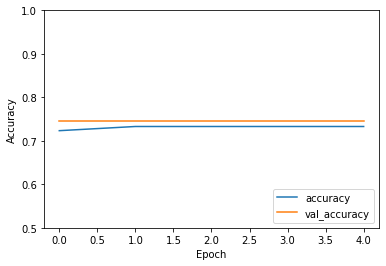

In [139]:
myModel.evaluate(myData.validate_images, myData.validate_labels)

In [ ]:
myModel.save_model(os.path.join(project_root, "Trained Models", "tmp"))

INFO:tensorflow:Assets written to: ./drive/MyDrive/CS 766 Project/Project Coding and Data Files/Trained Models/tmp/assets


In [ ]:
myModel.load_model(os.path.join(project_root, "Trained Models", "tmp"))